In [5]:
import pandas as pd
import statsmodels.api as sm
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
loansData = pd.read_csv('C:\Users\Kruthika\Documents\Python_Scripts\pdf\loansData_clean.csv')


In [6]:
#Checking if interest rate is > or < or = 12%
loansData['IR_TF']=loansData['Interest.Rate'].map(lambda x: 0 if x < 0.12 else 1)

loansData['intercept'] = 1.0

In [7]:
#A list of column names of independent variables and intercept
ind_vars = ['intercept', 'FICO.Score', 'Amount.Requested']

In [8]:
#Logistic regression model
logit = sm.Logit(loansData['IR_TF'], loansData[ind_vars])

In [9]:
#Fitting the model
result = logit.fit()

coeff = result.params
print coeff


Optimization terminated successfully.
         Current function value: 0.319503
         Iterations 8
intercept           60.125045
FICO.Score          -0.087423
Amount.Requested     0.000174
dtype: float64


In [19]:
IntrestRate = loansData['Interest.Rate']
LoanAmount = loansData['Amount.Requested']
FicoScore = loansData['FICO.Score']

interest_rate = -60.125 + 0.087423*(FicoScore) - 0.000174*(LoanAmount)

In [20]:
def logistic_function(FicoScore, LoanAmount):
    return (1/(1 + np.exp(-60.125 + 0.087423*(FicoScore) - 0.000174*(LoanAmount))))

In [24]:
#Calculating probability when FICO Score = 720 and Loan amount = 10000 for interest
    #rate less than or equal to 12%
loansData['p'] = logistic_function(FicoScore, LoanAmount)
group = loansData[['FICO.Score', 'Amount.Requested', 'p']].head(5)
group

,FICO.Score,Amount.Requested,p
0,735,20000,0.342786
1,715,19200,0.722792
2,690,35000,0.997249
3,695,10000,0.751385
4,695,12000,0.810616


In [13]:
p1 = logistic_function(720, 10000)
if p1<0.7:
    print('Obtain loan')
else:
        print('Loan not sanctioned')

Obtain loan


ValueError: x and y must have same first dimension

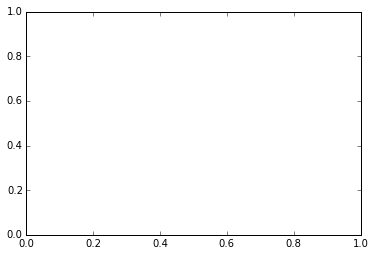

In [26]:
#Plotting the data           
#loansData.plot(kind='scatter', x=['FICO.Score','Amount.Requested'], y='p', alpha=0.3)
x1 =FicoScore
x2= LoanAmount

fig, ax1 = plt.subplots()

ax1.plot('FICO.', 'p', 'b-')
ax1.set_xlabel(x2)